In [1]:
# Importing libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Exercises 6.6

## Exercise 6.4:

Draw a correlation network for [these vectors](https://www.networkatlas.eu/exercises/6/4/data.txt) (ex_6.4), by only drawing edges with positive weights, ignoring self loops.

In [37]:
# Read the data into a dataframe
df_path = "ex_6.4.txt"
df = pd.read_csv(df_path, sep="\t")
df

,A,B,C,D,E,F,G,H
0,1,6,1,1,1,3,1,1
1,1,4,4,6,1,5,3,7
2,1,4,4,6,1,5,7,8
3,1,4,6,8,1,7,8,4
4,1,5,7,7,2,0,0,5
5,2,2,5,7,2,9,9,5
6,3,6,7,0,3,7,6,4
7,4,6,9,5,3,3,3,7
8,4,4,8,4,4,2,3,5
9,3,6,7,3,5,0,3,5


In [38]:
# Continue exercise ...
df = df.corr()
df

,A,B,C,D,E,F,G,H
A,1.000000,0.424893,-0.063301,-0.045454,0.963224,-0.075617,0.119563,0.033010
B,0.424893,1.000000,-0.125924,-0.291909,0.428816,-0.454298,-0.437119,-0.296770
C,-0.063301,-0.125924,1.000000,0.045746,0.025585,0.157640,0.125035,0.342966
D,-0.045454,-0.291909,0.045746,1.000000,-0.083474,0.003734,0.180765,0.519457
E,0.963224,0.428816,0.025585,-0.083474,1.000000,-0.164097,0.066077,0.020504
F,-0.075617,-0.454298,0.157640,0.003734,-0.164097,1.000000,0.847998,-0.005503
G,0.119563,-0.437119,0.125035,0.180765,0.066077,0.847998,1.000000,0.157194
H,0.033010,-0.296770,0.342966,0.519457,0.020504,-0.005503,0.157194,1.000000


In [39]:
df = df > 0 # mask of only positive correlation
df = df.unstack().reset_index()
df

,level_0,level_1,0
0,A,A,True
1,A,B,True
2,A,C,False
3,A,D,False
4,A,E,True
...,...,...,...
59,H,D,True
60,H,E,True
61,H,F,False
62,H,G,True


In [40]:
df.columns = ('source', 'target', 'has_edge')

df = df[df["has_edge"]]
df

,source,target,has_edge
0,A,A,True
1,A,B,True
4,A,E,True
6,A,G,True
7,A,H,True
8,B,A,True
9,B,B,True
12,B,E,True
18,C,C,True
19,C,D,True


In [44]:
# remove all self-loops
df = df[df['source'] != df['target']]
df

,source,target,has_edge
1,A,B,True
4,A,E,True
6,A,G,True
7,A,H,True
8,B,A,True
12,B,E,True
19,C,D,True
20,C,E,True
21,C,F,True
22,C,G,True


In [45]:
G = nx.from_pandas_edgelist(df)

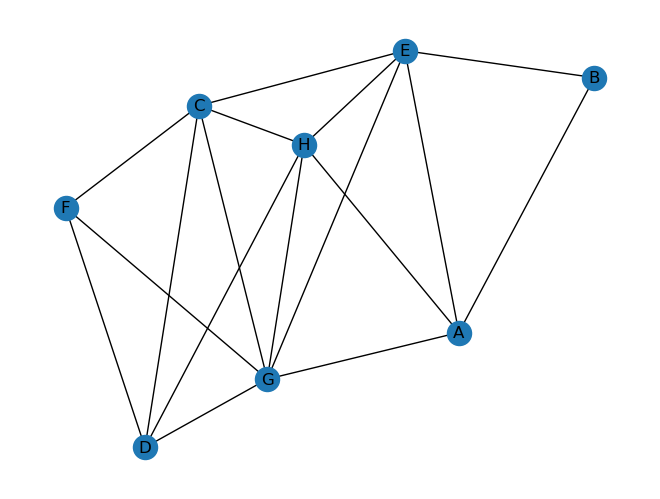

In [47]:
nx.draw(G, with_labels = True)
plt.show()

# Exercises 7.7

## Exercise 7.1: 

[This network](http://www.networkatlas.eu/exercises/7/1/data.txt) (ex_7.1) is bipartite. Identify the nodes in either type and find the
nodes, in either type, with the most neighbors.

In [48]:
# Load the edgelist
G = nx.read_edgelist("ex_7.1.txt")
print(G)

Graph with 141 nodes and 160 edges


In [55]:
nodes = nx.algorithms.bipartite.basic.sets(G)

In [56]:
node_neighbors = {n: len(set(G.neighbors(n))) for n in nodes[0]}
maxnode = max(node_neighbors, key = node_neighbors.get)
print(maxnode, node_neighbors[maxnode])

131 4


In [57]:
node_neighbors = {n: len(set(G.neighbors(n))) for n in nodes[1]}
maxnode = max(node_neighbors, key = node_neighbors.get)
print(maxnode, node_neighbors[maxnode])

2 59


## Exercise 7.4:
[This network](https://www.networkatlas.eu/exercises/7/4/data.txt) (ex_7.4) is dynamic, the third and fourth columns of the edge list tell you the first and last snapshot in which the edge was continuously present. An edge can reappear if the edge was present in two discontinuous time periods. Aggregate it using a disjoint window of size 3.

In [58]:
# Load the data
# We need to import as multigraph, or networkx will collapse the edges.
# We also need to make sure to import the edge type information.
G = nx.read_edgelist("ex_7.4.txt", create_using = nx.MultiGraph(), data = [("start", int), ("end", int)])
print(G)

MultiGraph with 13 nodes and 22 edges


Basically in this exercise we have many snapshots, but for efficiency we compress different windows of time into one graph and see all connections that have been present in that window so we end up with less graphs.

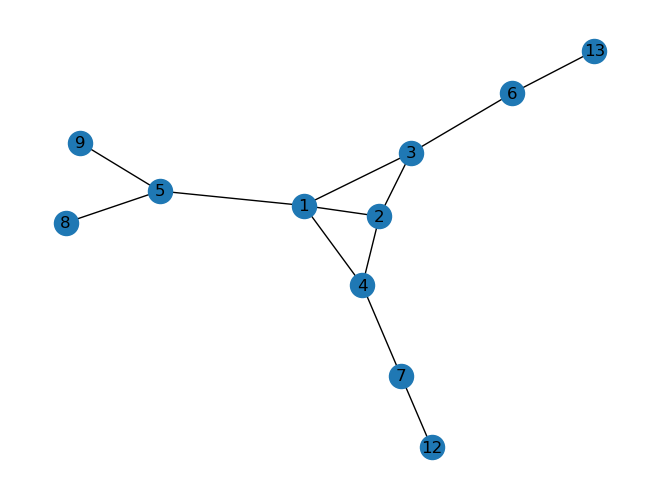

In [61]:
# Continue exercise ...
first_window = nx.Graph()
second_window = nx.Graph()
third_window = nx.Graph()

for e in G.edges(data = True):
    if e[2]['start'] <= 3:
        first_window.add_edge(e[0], e[1])
    if e[2]['start'] <= 6 and e[2]['end'] > 3:
        second_window.add_edge(e[0], e[1])
    if e[2]['end'] > 6:
        third_window.add_edge(e[0], e[1])
        
nx.draw(first_window, with_labels=True)
plt.show()